### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [40]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [41]:
# 1 - Load and describe the data
boston = load_boston()
print(boston.keys())
print(boston['DESCR'])

# organize
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']

# shape and stats
print(df.shape)
print(df.columns)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [42]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [43]:
# Peak
df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [44]:
# Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


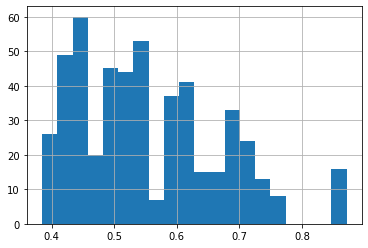

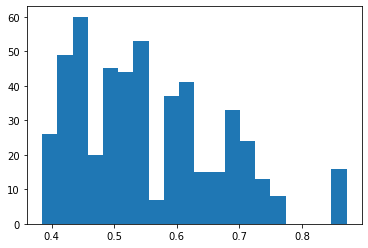

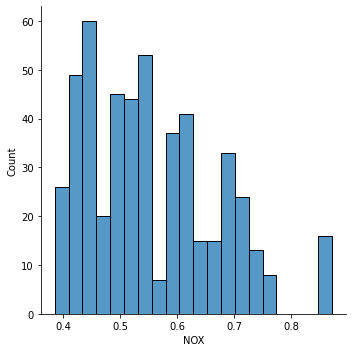

In [45]:
# 2 - Histogram and boxplot
df['NOX'].hist(bins=20)
plt.show()
plt.hist(df['NOX'], bins=20)
plt.show()
sns.displot(df['NOX'], bins=20, kde=False)
plt.show()

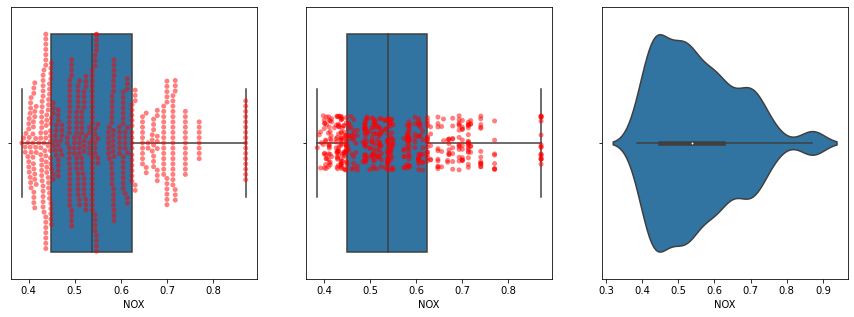

In [7]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.boxplot(x=df['NOX'], ax=ax[0])
sns.swarmplot(x=df['NOX'], color='r', alpha=0.5, ax=ax[0])
sns.boxplot(x=df['NOX'], ax=ax[1])
sns.stripplot(x=df['NOX'], color='r', alpha=0.5, ax=ax[1])
sns.violinplot(x=df['NOX'], ax=ax[2])

plt.show()

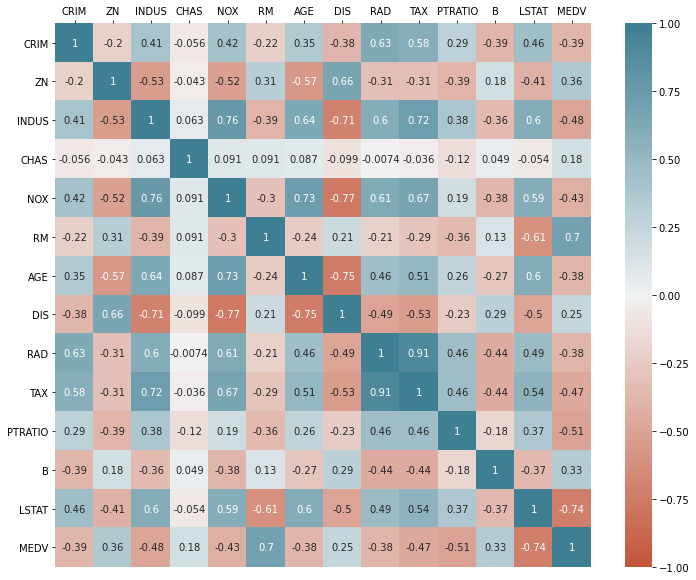

In [8]:
# 3 - Correlation matrix
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1,
                 cmap=sns.diverging_palette(20, 220, n=200))
ax.xaxis.tick_top() # move labels to the top

In [9]:
# 4 - correlated pairs
abs_corr = df.corr().abs()
s = abs_corr.unstack()
so = s.sort_values()
so[-20:]

NOX      INDUS      0.763651
INDUS    NOX        0.763651
DIS      NOX        0.769230
NOX      DIS        0.769230
TAX      RAD        0.910228
RAD      TAX        0.910228
CRIM     CRIM       1.000000
B        B          1.000000
PTRATIO  PTRATIO    1.000000
TAX      TAX        1.000000
RAD      RAD        1.000000
DIS      DIS        1.000000
AGE      AGE        1.000000
RM       RM         1.000000
NOX      NOX        1.000000
CHAS     CHAS       1.000000
INDUS    INDUS      1.000000
ZN       ZN         1.000000
LSTAT    LSTAT      1.000000
MEDV     MEDV       1.000000
dtype: float64

In [12]:
from scipy.stats import pearsonr, spearmanr

-0.7692301132258279
-0.8800148627197037


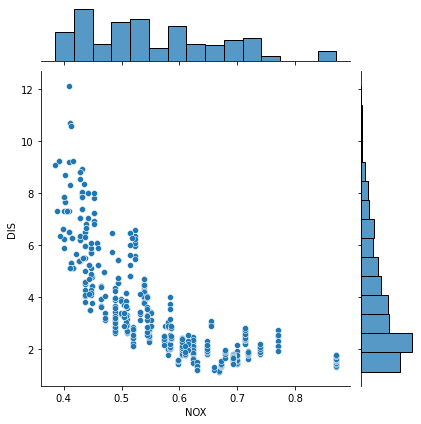

0.9102281885331871
0.7048757244922311


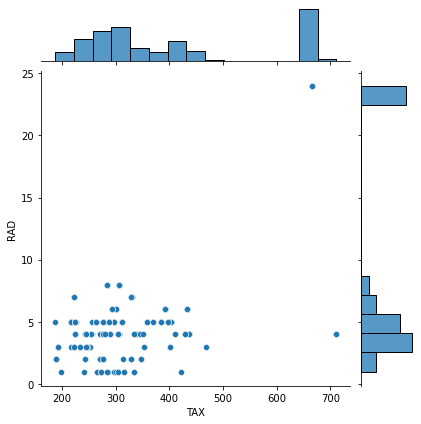

In [48]:
print(pearsonr(df['NOX'], df['DIS'])[0])
print(spearmanr(df['NOX'], df['DIS'])[0])
sns.jointplot(x=df['NOX'], y=df['DIS'], marginal_kws=dict(bins=15))
plt.show()
print(pearsonr(df['TAX'], df['RAD'])[0])
print(spearmanr(df['TAX'], df['RAD'])[0])
sns.jointplot(x=df['TAX'], y=df['RAD'], marginal_kws=dict(bins=15))
plt.show()

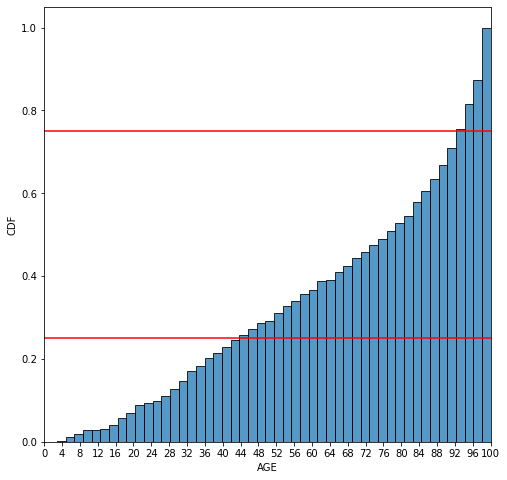

In [51]:
# 5 - Age cummulative histogram
plt.figure(figsize=(8,8))
sns.histplot(x=df['AGE'].values, stat='density', bins=50, 
             cumulative=True)
# sns.distplot(x=df['AGE'].values, bins=50, 
#              hist_kws={'cumulative': True, 'edgecolor': 'k'},
#              kde_kws={'lw': 0})
plt.xlabel('AGE')
plt.ylabel('CDF')
plt.axhline(0.25, color='red')
plt.axhline(0.75, color='red')
plt.xlim(0, df['AGE'].max())
plt.xticks(range(0, 101, 4));

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=2$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

$$n\times m\times k - 1 $$
$$n\times m\times 2 - 1 $$


We have $n\times m\times k$ combinations for the joint distribution. so $n\times m\times 2 - 1 $ probabilities are required.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

$$(k-1)+(n-1)+(m-1)$$
$$(2-1)+(n-1)+(m-1)$$
$$1+(n-1)+(m-1) = n+m-1$$

Now, we only need to define the marginal probabilities of $X, Y$ and $Z$. For $X$ we need to define $n-1$ probabilities. For $Y$ we need define $m-1$ probabilities. For $Z$ we need to define $k-1$ probabilities. Overall we get $1+(n-1)+(m-1) = n+m-1$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

$$k[(n-1)+(m-1)]+(k-1)$$
$$2[(n-1)+(m-1)]+(2-1)$$

For each of the $k$ values of $Z$ we can define the $P(X,Y|Z=z)=P(X|Z=z)P(Y|Z=z)$ using $(n-1)+(m-1)$ parameters. in addition we need to define $P(Z)$ using $(k-1)=1$ parameteres.

#### 2.D
Give an example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are NOT conditionally independent given $Z$, but $X$ and $Y$ are (unconditionally) independent.

Where $X$ and $Y$ are standard normal distribution ($N(0, 1)$).

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import norm

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [18]:
data = pd.read_csv('GMD_2021.csv', header=None, names=['x'])

In [19]:
data.head()

,x
0,3.575253
1,4.105491
2,3.903642
3,4.472249
4,4.297265


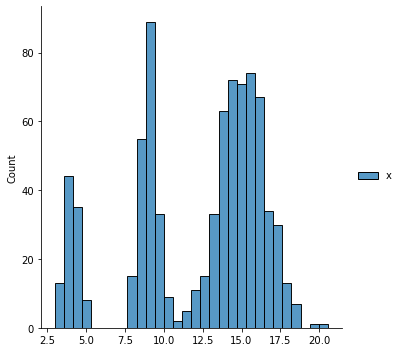

In [20]:
sns.displot(data, edgecolor='k', bins=30)

#### First method - EM

In [21]:
# EM with some params fixed
def init(data, K, Mu=None, sigma=None, W = None):
    """
    :param data: the complete data
    :param K: number of gaussians
    :return the initial guess of W, Mu, sigma
    """
    # Make initial guess
    N = data.shape[0]
    # guess each w as 1/K
    if W is None:
        W = np.full(K, 1 / K)

    # Guess mu as center of K quantiles, see pandas.qcut documentation
    quat_data, bins = pd.qcut(data['x'], K, retbins=True, labels=False)
    if Mu is None:
        Mu = (bins[:-1] + bins[1:]) / 2

    # Guess sigma as empiric sigma
    if sigma is None:
        sigma = np.array([np.sqrt(np.mean((data['x'][quat_data == k] - Mu[k]) ** 2)) for k in range(K)])
    
    return W, Mu, sigma

def Expectation(data, Mu, sigma, W):
    """
    :param data: the complete data
    :param Mu: expectation of each gaussian
    :param sigma: std for of gaussian
    :param W: weight of each gaussian
    :return ranks matrix: r(x,k)- responsibility of each data point x to gaussian k 
            Q: dividend of ranks matrix (likelihood)
    """
    Q = W[:, None] * norm.pdf(data['x'], Mu[:, None], sigma[:, None])
    rank = Q / np.sum(Q, axis=0)

    return pd.DataFrame(rank.T), pd.DataFrame(Q.T)

def Maximization(data, K, ranks):
    """
    :param data: the complete data
    :param K: number of gaussians
    :param ranks: ranks matrix- r(x,k)- responsibility of each data point x to gaussian k 
    :return W_new: new weight parameter of each gaussian 
            Mu_new: new expectation parameter of each gaussian 
            sigma_new: new std parameter of each gaussian 
    """
    
    N = data.shape[0]
    ranks_sum = ranks.sum(axis=0)
    W_new = ranks_sum / N
    Mu_new = np.sum(ranks.T * data['x'], axis=1) / ranks_sum
    sigma_new = np.sqrt(np.sum(ranks * ((data['x'][:, None] - Mu_new[None, :]) ** 2), axis=0) / ranks_sum)
    
    return W_new, Mu_new, sigma_new

def calc_delta(old_param, new_param):
    """
    :param old_param: old parameters to compare
    :param new_param: new parameters to compare
    :return maximal delta between each old and new parameter
    """
    # TODO: find the maximal delta between each old and new parameter
    return np.max(np.nan_to_num(np.abs((new_param - old_param) / old_param)))

def ExpectationMaximization(data, K, maxIter, epsilon, Mu=None, sigma=None, W = None):
    """
    :param data: the complete data
    :param K: number of gaussians
    :param maxIter: maximal number of iterations to perform
    :param epsilon: minimal change in parameters to declare convergence
    :return gaussian estimation for each point
    """

    print('K',K)
    W, Mu, sigma = init(data, K, Mu, sigma, W)
    print('init', W, Mu, sigma)


    # Loop until convergence
    delta = np.infty
    iter = 0
    
    log_likelihood = []
    while delta > epsilon and iter <= maxIter:
        # E step
        ranks, Q = Expectation(data, Mu, sigma, W)
#         print(ranks)
#         print(Q)
        
        # ranks form the responsibilities matrix
        likelihood = Q.sum(axis=1)
        log_likelihood.append(np.sum(np.log(likelihood.values), axis = 0))

        # M step
        W_new, Mu_new, sigma_new = Maximization(data, K, ranks)
        print(W_new.values, Mu_new.values, sigma_new.values)
        # fixed the relevant params
        Mu_new[0] = Mu[0]
        Mu_new[1] = Mu[1]
        sigma_new = sigma
        W_new[1] = W[1]
        
        # Check significant change in parameters
        delta = max(calc_delta(W, W_new), calc_delta(Mu, Mu_new), calc_delta(sigma, sigma_new))
        W, Mu, sigma = W_new, Mu_new, sigma_new
        iter += 1
#         print('iter', iter)
#         print('W',W)
#         print('mu', Mu)
#         print('s', sigma)
    
    print(iter)
    return Mu, sigma, W

In [22]:
Mu, sigma, W = ExpectationMaximization(data, 3, 1000, 0.0001, Mu=np.array([4,9,13]), sigma=np.array([0.5, 0.5, 1.5]), W = np.array([0.1,0.25,0.65]))
print('Means = {:.2f}, {:.2f}, {:.2f}'.format(*Mu))
print('Stds = {:.2f}, {:.2f}, {:.2f}'.format(*sigma))
print('Weights = {:.2f}, {:.2f}, {:.2f}'.format(*W))

K 3
init [0.1  0.25 0.65] [ 4  9 13] [0.5 0.5 1.5]
[0.12499978 0.23147815 0.64352206] [ 4.08380879  8.94080277 14.94706694] [0.46878708 0.47501207 1.73635759]
[0.125      0.24930642 0.62569358] [ 4.08381061  8.99378261 15.0971007 ] [0.46878882 0.52090303 1.50937475]
[0.125      0.24979942 0.62520058] [ 4.08381061  8.9961516  15.10096693] [0.46878882 0.52337523 1.50363762]
[0.125      0.24981095 0.62518905] [ 4.08381061  8.99620793 15.101057  ] [0.46878882 0.52343484 1.50350435]
4
Means = 4.00, 9.00, 15.10
Stds = 0.50, 0.50, 1.50
Weights = 0.12, 0.25, 0.63


<ipython-input-21-d5316ce60d4d>:53: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  sigma_new = np.sqrt(np.sum(ranks * ((data['x'][:, None] - Mu_new[None, :]) ** 2), axis=0) / ranks_sum)
<ipython-input-21-d5316ce60d4d>:34: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Q = W[:, None] * norm.pdf(data['x'], Mu[:, None], sigma[:, None])


#### Second Method - Algebra

In [23]:
data_mean = data['x'].mean()
data_var = data['x'].var()
data_mean, data_var

(12.198843082110526, 17.591027829588857)

$ \mu_1 = 4, \mu_2 = 9 , \mu_3=?$ <br>
$ var_1 = 0.25, var_2 = 0.25, var_3 = 2.25 $ <br>
$ w_1 = ?, w_2 = 0.25, w_3 = ? $ <br>
$ Data\_Mean\ (\mu) = 12.2 $ <br>
$ Data\_Var\ (\sigma^2)= 17.59 $ <br>

$ 1)\ w_1 + w_2 + w_3 = 1 $ <br>
$ 2)\ w_1*\mu_1 + w_2*\mu_2 + w_3*\mu_3 = Data\_Mean $ <br>
$ 3)\ w_1*Var_1 + w_2*Var_2 + w_3*var_3 + w_1*(\mu_1 - \mu)^2 + w_2*(\mu_2 - \mu)^2 + w_3*(\mu_3 - \mu)^2 = \sigma^2 $

$w_1 + 0.25 + w_3 = 1 $ <br>
$4*w_1 + 9*0.25 + w_3*\mu_3 = 12.2 $ <br>
$w_1*0.25 + 0.25*0.25 + w_3*2.25 + w_1*(4 - 12.2)^2 + 0.25*(9 - 12.2)^2 + w_3*(\mu_3 - 12.2)^2 = 17.59 $

...

$ w_1 \approx 0.123, w_3 = \approx 0.626, \mu_3 \approx 15.09 $

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

In [24]:
min_x = data['x'].min()
max_x = data['x'].max()
min_x, max_x

(2.9698341798407326, 20.55908160316134)

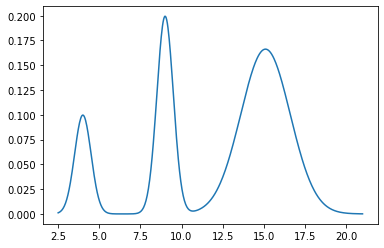

In [25]:
X = np.linspace(2.5, 21, 500)
Y = sum(W[i] * norm.pdf(X, Mu[i], sigma[i]) for i in range(3))
plt.plot(X, Y)

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

First:<br>
Draw a coin <br>
Draw a number from uniform 0-1 <br>
Select relevant gaussian and use the inverse of the cdf<br>
<br>
Second:<br>
Draw a number from uniform 0-1 <br>
Use the inverse of the gaussians mixture's cdf

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


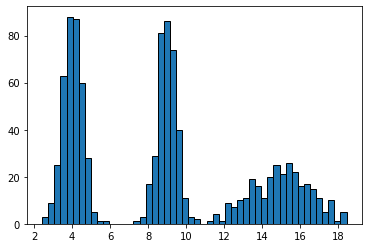

In [26]:
# flip a coin 1000 times
idx = np.random.choice(range(3), 1000)
# use ppf on uniform
data = [norm.ppf(np.random.random(),Mu[i],sigma[i]) for i in idx]

plt.hist(data, bins=50, edgecolor='k');

#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

In [27]:
import random
from bisect import bisect_left

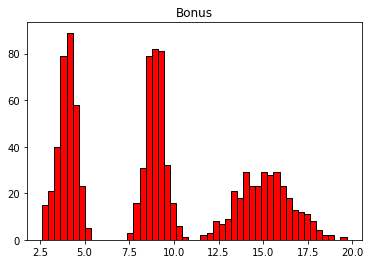

In [30]:
def mixture_cdf(x):
    return sum(1/3.0 * norm.cdf(x,Mu[i],sigma[i]) for i in range(3))

def inverse_mixture_cdf(q, start=2, end=22):
    x = np.linspace(start, end, 10000)
    mix_cdf = mixture_cdf(x)
    index = [bisect_left(mix_cdf, r) for r in q]
    res = [x[i] if i != len(x) else x[-1] for i in index]
    return res

    
cdfs = np.random.random(1000)
data_bonus = inverse_mixture_cdf(cdfs)

plt.hist(data_bonus, color='red', bins=50, edgecolor='black')
plt.title('Bonus')
plt.show()

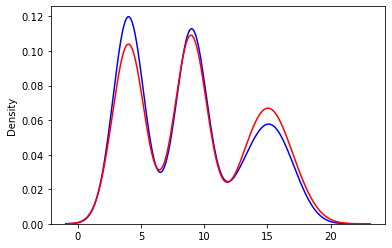

In [31]:
# Plot the 2 methods together
sns.kdeplot(data, color="b")
sns.kdeplot(data_bonus, color="r")
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [32]:
dist = norm(70000, 30000)

#### 4.A
What percent of people earn less than 50,000 RCU?

In [33]:
dist.cdf(50000)

0.2524925375469229

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [34]:
dist.cdf(65000) - dist.cdf(45000)

0.23148778642545326

#### 4.C
What percent of people earn more than 70,000 RCU?

In [35]:
dist.sf(70000), 1 - dist.cdf(70000)

(0.5, 0.5)

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [36]:
dist.sf(140000) * 1000

9.815328628645334

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [37]:
def single_coupon_probabilities(n):
    return [(n - i) / float(n) for i in range(n)]

def single_coupon_mean(n):
    """
    Returns the mean of the single coupon problem, i.e. E(T_N).
    """
    return sum([1.0 / p for p in single_coupon_probabilities(n)])

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [38]:
def single_coupon_variance(n):
    """
    Returns the variance of the single coupon problem, i.e. V(T_N).
    """
    return sum([(1.0 - p) / (p ** 2) for p in single_coupon_probabilities(n)])

#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [39]:
from scipy.stats import geom

def ngeomconv(n, k):
    """
    Returns the probability that a convolution of `n` geometric distributions will be lower or equal to `k`.
    This is a bit modified version of the code we have seen in the class.
 
    :param n: The number of distributions
    :param k: The desired value
    :return: A tuple (PDF(T_N, K), CDF(T_N, K))
    """
    
    probabilities = single_coupon_probabilities(n)
    x = np.arange(1, k + 1)
    conv = geom.pmf(x, probabilities[0])
    for current_p in probabilities[1:]:
        next_dist = geom.pmf(x, current_p)
        conv = np.convolve(conv, next_dist)
    conv = conv[:k + 1 - n]
    print(len(conv))
    return sum(conv)
 
print("mean for T_30: {} ".format(single_coupon_mean(100)))
print("variance for T_30: {}".format(single_coupon_variance(100)))
print("Std: {}".format(np.sqrt(single_coupon_variance(100))))
print(1 - ngeomconv(30, 60))

mean for T_30: 518.737751763962 
variance for T_30: 15831.101250084967
Std: 125.82170420911079
31
0.9940158432042814


#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

$P(\mu - b\sigma \leq T_{20} \leq \mu + b\sigma) \geq 1-\frac{1}{b^2}$

$P(71.95 - 23.8b \leq T_{20} \leq 71.95 + 23.8b) \geq 1-\frac{1}{b^2}$

$ 39 = 71.95-23.8b \rightarrow b = 1.38 $

$P(39 \leq T_{20} \leq 104.8) \geq 1-\frac{1}{1.38^2} = 0.47$

$P(T_{20} \gt 40) \geq P(39 \leq T_{20} \leq 104.8) \geq 0.47$

##### also OK:

$P(\mu - b\sigma \leq T_{20} \leq \mu + b\sigma) \geq 1-\frac{1}{b^2}$

$P(71.95 - 23.8b \leq T_{20} \leq 71.95 + 23.8b) \geq 1-\frac{1}{b^2}$

$ 40 = 71.95-23.8b \rightarrow b = 1.34 $

$P(40 \leq T_{20} \leq 103.9) \geq 1-\frac{1}{1.34^2} = 0.44$

$P(T_{20} \geq 40) \geq P(40 \leq T_{20} \leq 103.9) \geq 0.44$

